In [1]:
import matplotlib.pyplot as plt
import pandas as pd

path = 'D:/OneDrive - unist.ac.kr/Development & Career/진행중 활동/Aiffel 양재/2 데이터톤/corona/'
patient = pd.read_csv(path + 'PatientInfo.csv')
weather = pd.read_csv(path + 'Weather.csv')

In [2]:
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
cases = patient.confirmed_date.value_counts().sort_index()
cases.head()

2020-01-20    1
2020-01-23    1
2020-01-26    1
2020-01-27    1
2020-01-30    4
Name: confirmed_date, dtype: int64

In [4]:
cases.index = pd.DatetimeIndex(cases.index)
cases = cases.reindex(pd.date_range(cases.index.min(), cases.index.max()), fill_value=0)
cases.head()

2020-01-20    1
2020-01-21    0
2020-01-22    0
2020-01-23    1
2020-01-24    0
Freq: D, Name: confirmed_date, dtype: int64

In [5]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [6]:
weather = weather[weather['code'] == 10000]
temp = weather.groupby('date')['avg_temp'].sum()
temp.head()

date
2016-01-01    1.2
2016-01-02    5.7
2016-01-03    6.5
2016-01-04    2.0
2016-01-05   -2.7
Name: avg_temp, dtype: float64

In [7]:
temp.index = pd.DatetimeIndex(temp.index)
cases_temp = pd.merge(cases, temp, left_index=True, right_index=True)
cases_temp.head()

,confirmed_date,avg_temp
2020-01-20,1,0.7
2020-01-21,0,-0.4
2020-01-22,0,3.0
2020-01-23,1,4.6
2020-01-24,0,2.8


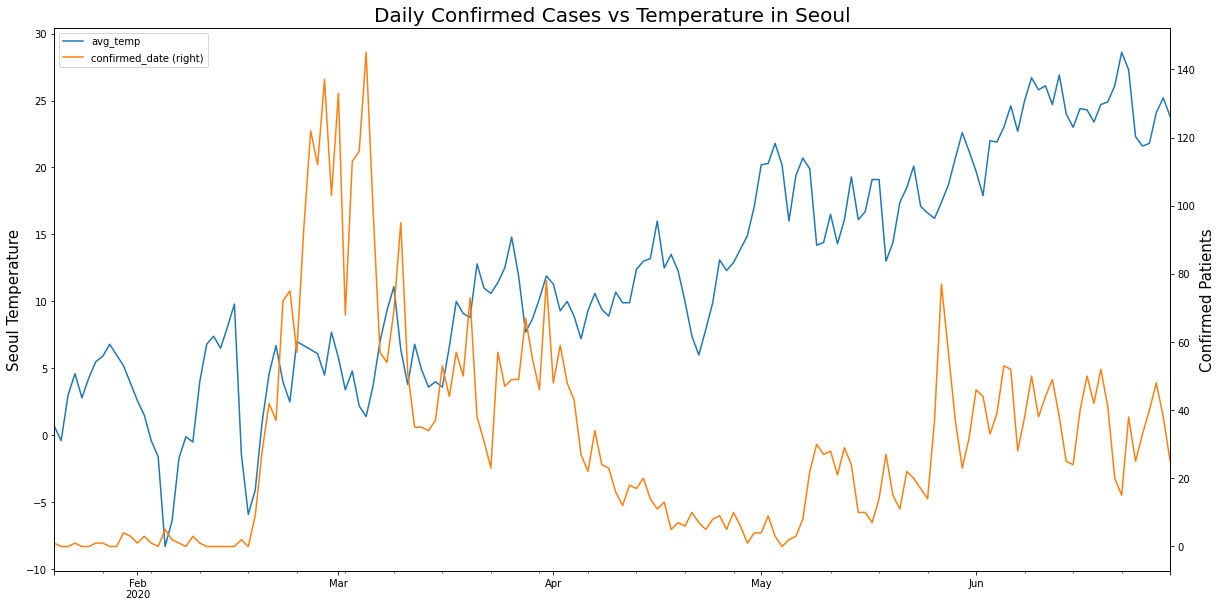

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = cases_temp.plot(use_index=True,
                         kind='line',
                         y='avg_temp',
                         ax=ax)
ax2 = cases_temp.plot(use_index=True,
                         kind='line',
                         y='confirmed_date',
                         secondary_y=True,
                         ax=ax)

ax1.set_ylabel('Seoul Temperature', fontsize=15)
ax2.set_ylabel('Confirmed Patients', fontsize=15)
ax.set_title('Daily Confirmed Cases vs Temperature in Seoul', fontsize=20)
plt.show()

(array([  7.,   9.,   3., 181., 610., 803., 729., 625., 396., 238., 284.,
        226., 343., 560., 141.]),
 array([-8.3 , -5.84, -3.38, -0.92,  1.54,  4.  ,  6.46,  8.92, 11.38,
        13.84, 16.3 , 18.76, 21.22, 23.68, 26.14, 28.6 ]),
 <BarContainer object of 15 artists>)

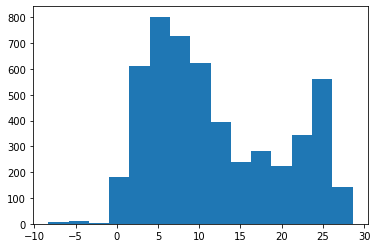

In [9]:
patient['date'] = patient['confirmed_date']
patient_temp = pd.merge(patient, weather, how='left', on='date')
plt.hist(patient_temp['avg_temp'], bins=15)